# Projet Machine Learning: Classification

## Objectif:
- Developement d'un bon modèle de classification

## Principales Etapes d'un projet Machine Learning
- 1. Récupération et vérification des données
- 2. Exploration et préparation des données
- 3. Développement des modèles
- 4. Evaluation des mled devellopés
- 5. Recherche des meilleurs hyperparamètres des modèles devellopésèes


### Importation des bibliothèques

In [1]:
# Manipulation et exploration des données
import pandas as pd
import numpy as np
# Exploration graphique
import matplotlib.pyplot as plt
import seaborn as sns

#Insérer des images et filrer les message d'avertissements
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

## 1. Récupération et vérification des données

In [2]:
data = pd.read_csv("Data.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = pd.read_csv("Data.csv", usecols=[ 'Survived', 'Pclass', 'Sex', 'Age',
       'SibSp','Parch', 'Fare', 'Embarked'])
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


## 2. Exploratoration et prépararation des données

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
data.duplicated().sum()

111

**Exploration visuelle et statistique des variables catégorielles**

In [8]:
data["Survived"]=pd.Categorical(data["Survived"])
data["Sex"]=pd.Categorical(data["Sex"])
data["SibSp"]=pd.Categorical(data["SibSp"])
data["Parch"]=pd.Categorical(data["Parch"])
data["Pclass"]=pd.Categorical(data["Pclass"])
data["Embarked"]=pd.Categorical(data["Embarked"])

In [9]:
data.describe(include='category')

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


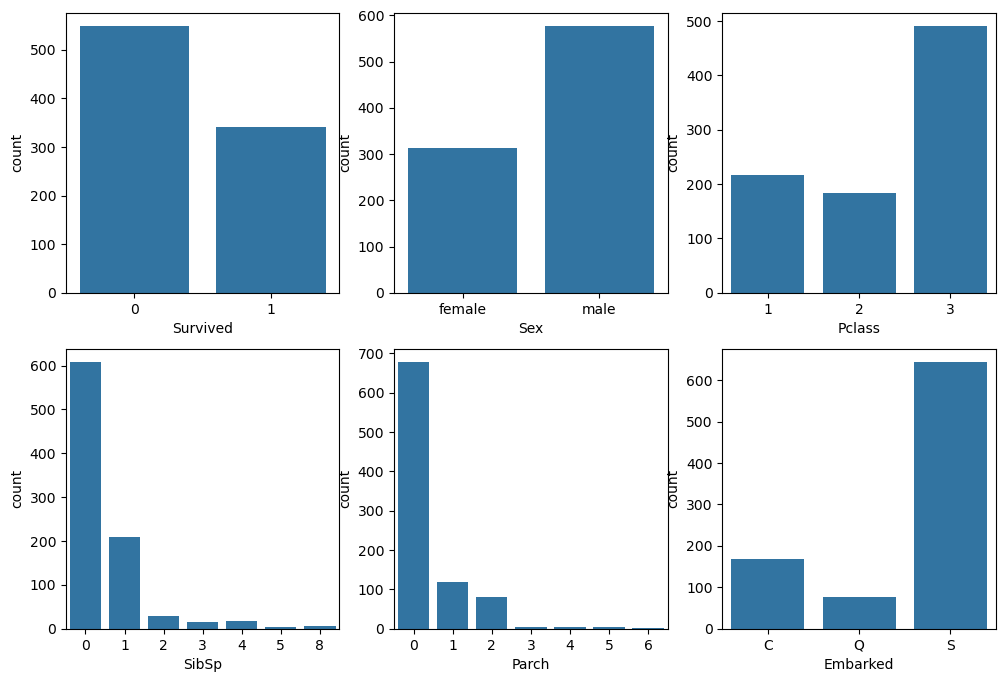

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(12,8), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})
sns.countplot(data, x=data['Survived'],ax = axs[0,0] );
sns.countplot(data, x=data['Sex'],ax = axs[0,1] );
sns.countplot(data, x=data['Pclass'],ax = axs[0,2] );
sns.countplot(data, x=data['SibSp'],ax = axs[1,0] );
sns.countplot(data, x=data['Parch'],ax = axs[1,1] );
sns.countplot(data, x=data['Embarked'],ax = axs[1,2] );

**Exploration visuelle et statistique des variables numériques**

In [11]:
data.describe(include=np.number)

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


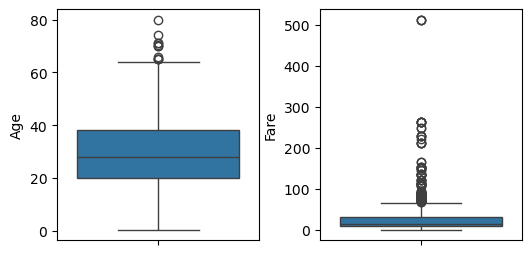

In [12]:
fig, axs = plt.subplots(1,2,figsize=(6,3), gridspec_kw={'wspace': 0.3})
sns.boxplot(data['Age'], ax = axs[0])
sns.boxplot(data['Fare'], ax = axs[1])
plt.show()

### Conclusion
- Données dupliquées
- Données manquantes
- Données aberrantes
- Modalités moins représentatives

**Supprission des données dupliquées**

In [13]:
data = data.drop_duplicates()
data.duplicated().sum()

0

**Supprission des modalités les moins représentatives**

In [14]:
Parach_3456 = data[(data["Parch"]==3)|(data["Parch"]==4)|(data["Parch"]==5)|(data["Parch"]==6)]
SibSp_3458 = data[(data["SibSp"]==3)|(data["SibSp"]==4)|(data["SibSp"]==5)|(data["SibSp"]==8)]
Parach_3456.shape, SibSp_3458.shape

((15, 8), (39, 8))

In [15]:
Parach_3456.index, SibSp_3458.index

(Index([13, 25, 86, 167, 360, 437, 438, 567, 610, 638, 678, 736, 774, 858, 885], dtype='int64'),
 Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159, 164,
        171, 176, 180, 182, 229, 233, 261, 266, 278, 341, 374, 386, 480, 541,
        542, 634, 642, 683, 686, 726, 787, 813, 819, 824, 850],
       dtype='int64'))

In [16]:
data = data.drop(Parach_3456.index)

In [17]:
data = data.drop(SibSp_3458.index)

In [18]:
data["Parch"].unique()

[0, 2, 1]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [19]:
data["SibSp"].unique()

[1, 0, 2]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 8]

**Traitement des données manquantes**

In [20]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         100
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [21]:
data["Age"]= data["Age"].fillna(data["Age"].mode()[0])
data["Age"].isnull().sum()

0

In [22]:
data["Embarked"]= data["Embarked"].fillna(data["Embarked"].mode()[0])
data["Embarked"].isnull().sum()

0

In [23]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Traitement des données aberrantes**

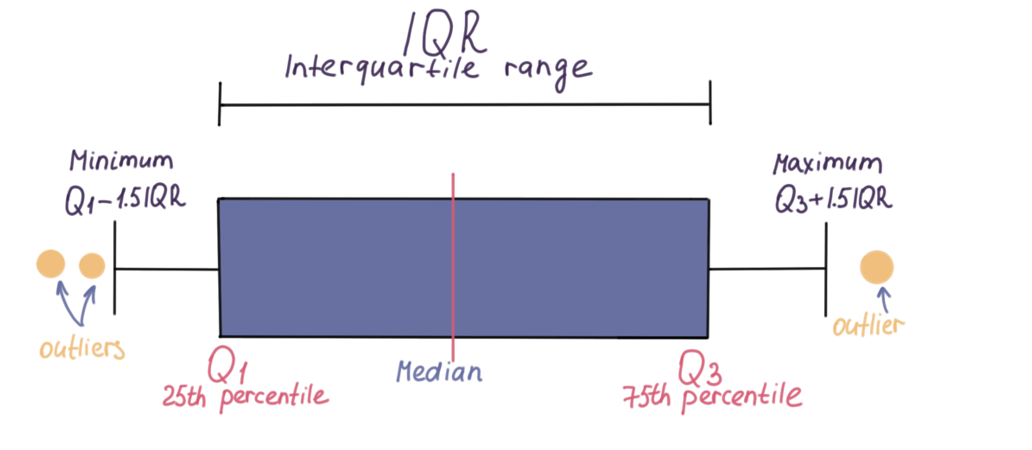

In [24]:
Image("ValeursAberrantes.png", width = 600, height = 300)

In [25]:
Q1 = data["Age"].quantile(0.25)
Q3 = data["Age"].quantile(0.75)
IQR = Q3-Q1
Q1, Q3, IQR

(22.0, 36.0, 14.0)

In [26]:
Minimum = Q1 - 1.5*IQR
Maximum = Q3 + 1.5*IQR
Minimum, Maximum


(1.0, 57.0)

In [27]:
outlier_Age = data[(data["Age"]<Minimum) | (data["Age"]>Maximum) ]
outlier_Age.shape

(37, 8)

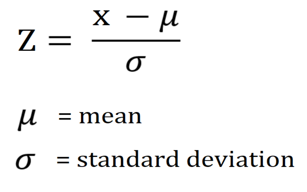

In [28]:
Image("z-score.PNG")

In [29]:
data["z-Fare"]=(data["Fare"]-data["Fare"].mean())/data["Fare"].std()
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,z-Fare
0,0,3,male,22.0,1,0,7.2500,S,-0.515681
1,1,1,female,38.0,1,0,71.2833,C,0.731273
2,1,3,female,26.0,0,0,7.9250,S,-0.502537
3,1,1,female,35.0,1,0,53.1000,S,0.377180
4,0,3,male,35.0,0,0,8.0500,S,-0.500103


In [30]:
outlier_Fare = data[(data["z-Fare"]<-3) | (data["z-Fare"]>3) ]
outlier_Fare.shape

(16, 9)

In [31]:
outlier_Fare.index

Index([118, 258, 299, 311, 377, 380, 527, 557, 679, 689, 700, 716, 730, 737,
       742, 779],
      dtype='int64')

In [32]:
data = data.drop(["z-Fare"], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [33]:
outlier_Fare = outlier_Fare.drop(["z-Fare"], axis=1)
outlier_Fare.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
118,0,1,male,24.0,0,1,247.5208,C
258,1,1,female,35.0,0,0,512.3292,C
299,1,1,female,50.0,0,1,247.5208,C
311,1,1,female,18.0,2,2,262.3750,C
377,0,1,male,27.0,0,2,211.5000,C


In [34]:
outliers = pd.concat([ outlier_Age , outlier_Fare ]  )
outliers.shape

(53, 8)

In [35]:
outliers.duplicated().sum()

0

In [36]:
data = data.drop(outliers.index)

In [37]:
data.shape

(673, 8)

In [38]:
data.to_csv("SaveData.csv", index=False)

### Feature Engineering

In [39]:
df = pd.read_csv("SaveData.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Feature Engineering des variables catégorielles**d

- Codage binaire pour la variable sex
- Codage dummy pour la variable Embarked

In [40]:
df["Sex"]=pd.Categorical(df["Sex"])
df["Embarked"]=pd.Categorical(df["Embarked"])
df.dtypes

Survived       int64
Pclass         int64
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

In [41]:
df["Sex_c"]=df["Sex"].map({"female":0, "male":1}).astype(int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_c
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [42]:
df.dtypes

Survived       int64
Pclass         int64
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
Sex_c          int32
dtype: object

In [43]:
Embarked_c=pd.get_dummies( df["Embarked"], prefix="Embarked", drop_first=True 
                          ,dtype=int )
Embarked_c.head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [44]:
df= pd.concat([df, Embarked_c], axis=1 )
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_c,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


**Feature Engineering des variables numérique**

- Normalisation des variables numériques

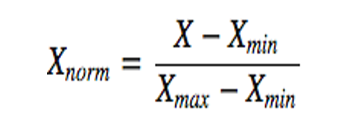

In [45]:
Image("Normalisation.PNG")

In [46]:
min_age = df['Age'].min()
max_age=df['Age'].max()
min_fare = df['Fare'].min()
max_fare=df['Fare'].max()
min_age, min_fare, max_age, max_fare

(1.0, 0.0, 57.0, 164.8667)

In [47]:
df['Age_norm']=(df['Age']-min_age)/(max_age-min_age)
df['Fare_norm']=(df['Fare']-min_fare)/(max_fare-min_fare)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_c,Embarked_Q,Embarked_S,Age_norm,Fare_norm
0,0,3,male,22.0,1,0,7.2500,S,1,0,1,0.375000,0.043975
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0.660714,0.432369
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,0.446429,0.048069
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,0.607143,0.322078
4,0,3,male,35.0,0,0,8.0500,S,1,0,1,0.607143,0.048827


In [48]:
df.to_csv('SaveData.csv', index=False)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Sex_c', 'Embarked_Q', 'Embarked_S', 'Age_norm',
       'Fare_norm'],
      dtype='object')

In [49]:
df_train = pd.read_csv('SaveData.csv', usecols=['Survived', 'Pclass','Parch','Sex_c','SibSp', 
                                'Embarked_Q', 'Embarked_S', 'Age_norm', 'Fare_norm'])
df_train.head()

,Survived,Pclass,SibSp,Parch,Sex_c,Embarked_Q,Embarked_S,Age_norm,Fare_norm
0,0,3,1,0,1,0,1,0.375000,0.043975
1,1,1,1,0,0,0,0,0.660714,0.432369
2,1,3,0,0,0,0,1,0.446429,0.048069
3,1,1,1,0,0,0,1,0.607143,0.322078
4,0,3,0,0,1,0,1,0.607143,0.048827


In [50]:
df_train.dtypes

Survived        int64
Pclass          int64
SibSp           int64
Parch           int64
Sex_c           int64
Embarked_Q      int64
Embarked_S      int64
Age_norm      float64
Fare_norm     float64
dtype: object

## 3. Développement des modèles
- Importer les librairies
- Diviser les données en données d'apprentissage et de test
- Créer les modèles
- Effectuer l'apprentissage
- Evaluer les modèles avec la base de test

**Importer les librairies**

In [51]:
#Import des librairies pour préparer une base de'apprentissage et la base de test
from sklearn import model_selection
from sklearn.model_selection import train_test_split 

#Import des librairies pour la modélisation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Import des librairies pour le test des modèles developpés
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

**Division les données en données d'apprentissage et de test**

In [52]:
# Variables d'entrées
X = df_train.drop('Survived', axis=1)
#Variable de sortie
y = df_train['Survived']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size =0.3, 
                                                                    random_state = 42)
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((471, 8), (471,), (202, 8), (202,))

 **Créeation des modèles**

In [53]:
# Modèle régression Logistique
lr = LogisticRegression() 
# Modèle CRT d'arbre de décision
crt= DecisionTreeClassifier() 
# Modèle C5.x d'arbre de décision
c5 = DecisionTreeClassifier(criterion='entropy')
# Modèle SVM
svm= SVC()
# Modèle KNN
knn = KNeighborsClassifier()
# Modèle Random Forest
rf= RandomForestClassifier()

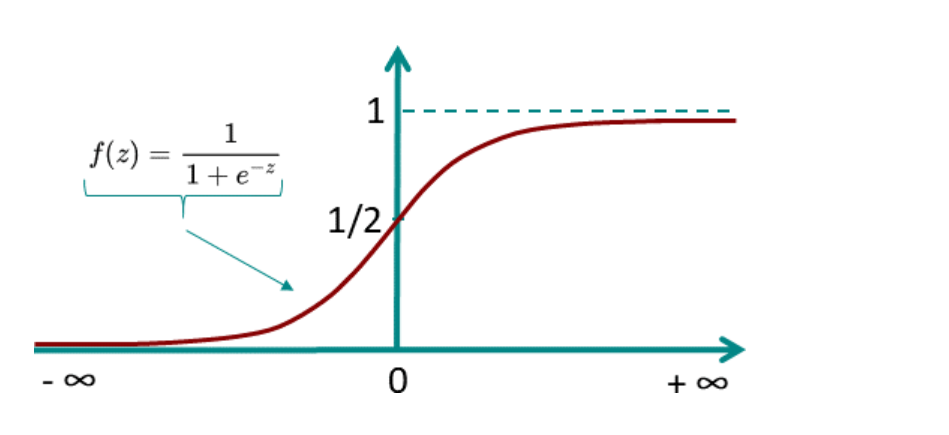

In [54]:
Image("RegrfessionLogistique.png", width = 600, height = 300)

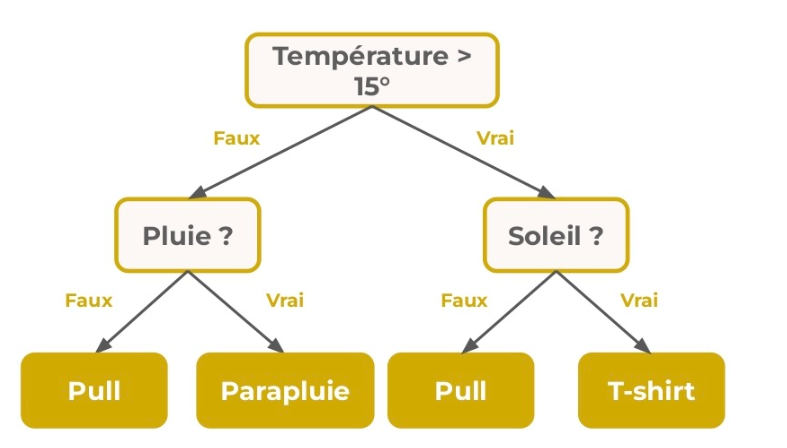

In [55]:
Image("ArbreDecision.png", width = 500, height = 300)

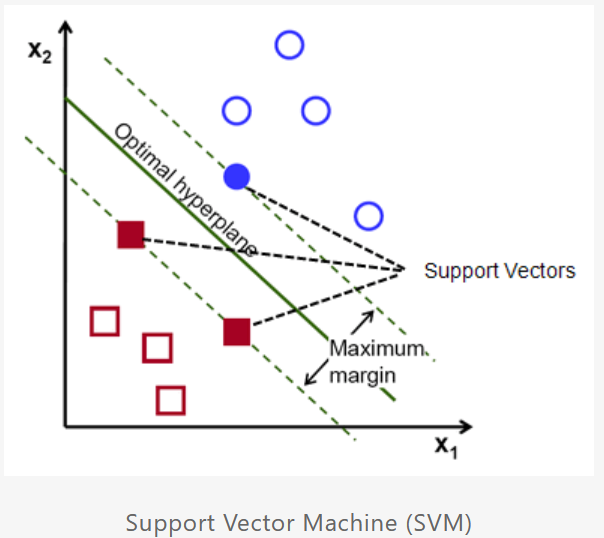

In [56]:
Image("SVM.png", width = 500, height = 300)

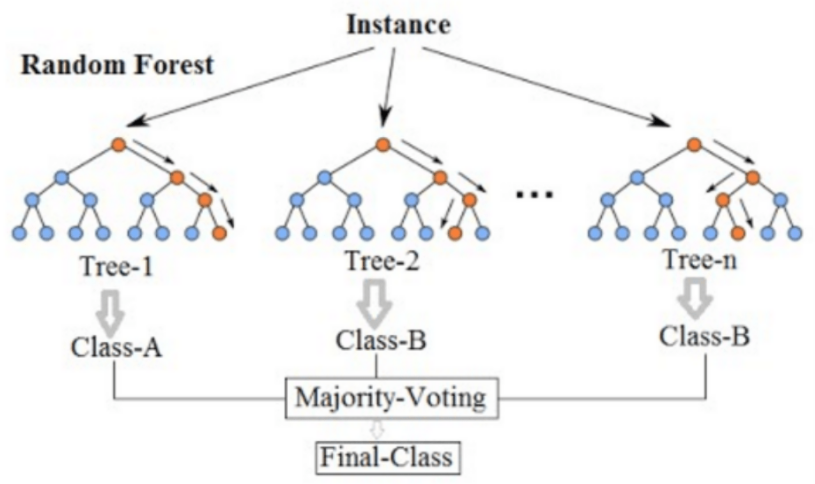

In [57]:
Image("randomforest.png", width = 600, height = 300)

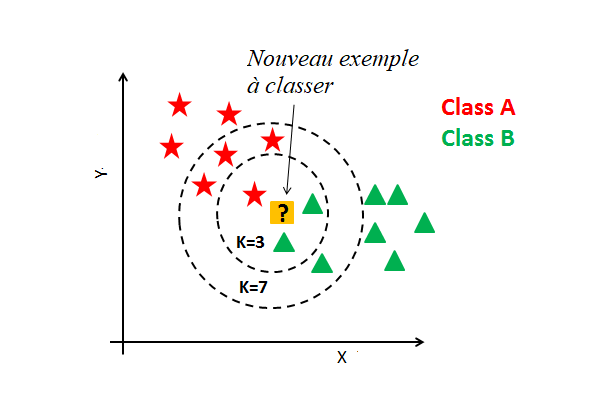

In [58]:
Image("KNN.PNG", width = 600, height = 300)

**Apprentissage des modèle sur la base d'apprentissage**

In [59]:
lr.fit(X_train, y_train);
crt.fit(X_train, y_train);
c5.fit(X_train, y_train);
svm.fit(X_train, y_train);
rf.fit(X_train, y_train);
knn.fit(X_train, y_train);

**Test des modèles sur la base de test**

In [60]:
y_predlr = lr.predict(X_test) 
y_predcrt = crt.predict(X_test)
y_predc5 = c5.predict(X_test)
y_predsvm = svm.predict(X_test)
y_predrf = rf.predict(X_test)
y_predknn = knn.predict(X_test)

## 4. Evaluation des modèles developpés

**Matrices de confusion des modèles developpés**

In [61]:
# Matrice de confusion Régression Logistique
print("\nMatrice de confusion du modèle Régression logistique:")
print(confusion_matrix(y_test, y_predlr))
# Matrice de confusion CRT
print("\nMatrice de confusion du modèle CRT:")
print(confusion_matrix(y_test, y_predcrt))
# Matrice de confusion C5
print("\nMatrice de confusion du modèle C5:")
print(confusion_matrix(y_test, y_predc5))
# Matrice de confusion SVM
print("\nMatrice de confusion du modèle SVM:")
print(confusion_matrix(y_test, y_predsvm))

# Matrice de confusion KNN
print("\nMatrice de confusion du modèle KNN:")
print(confusion_matrix(y_test, y_predknn))
# Matrice de confusion rf
print("\nMatrice de confusion du modèle Forêts aléatoires:")
print(confusion_matrix(y_test, y_predrf))
# Matrice de confusion Gradient Boosting


Matrice de confusion du modèle Régression logistique:
[[101  23]
 [ 20  58]]

Matrice de confusion du modèle CRT:
[[101  23]
 [ 33  45]]

Matrice de confusion du modèle C5:
[[102  22]
 [ 31  47]]

Matrice de confusion du modèle SVM:
[[106  18]
 [ 27  51]]

Matrice de confusion du modèle KNN:
[[103  21]
 [ 28  50]]

Matrice de confusion du modèle Forêts aléatoires:
[[100  24]
 [ 22  56]]


**Accuracy des modèles developpés**

In [62]:
print ('Accuracy Model Regression Logistique:', metrics.accuracy_score(y_test, y_predlr))
print ('Accuracy Model CRT:', metrics.accuracy_score(y_test, y_predcrt))
print ('Accuracy Model C5:', metrics.accuracy_score(y_test, y_predc5))
print ('Accuracy Model SVM:', metrics.accuracy_score(y_test, y_predsvm))
print ('Accuracy Model KNN:', metrics.accuracy_score(y_test, y_predknn))
print ('Accuracy Model Random Forest:', metrics.accuracy_score(y_test, y_predrf))

Accuracy Model Regression Logistique: 0.7871287128712872
Accuracy Model CRT: 0.7227722772277227
Accuracy Model C5: 0.7376237623762376
Accuracy Model SVM: 0.7772277227722773
Accuracy Model KNN: 0.7574257425742574
Accuracy Model Random Forest: 0.7722772277227723


**Air sous la courbe de ROC des modèles developpés**

In [63]:
print ('Air sous ROC Model Regression Logistique:', roc_auc_score(y_test, y_predlr))
print ('Air sou ROC Model CRT :', roc_auc_score(y_test, y_predcrt))
print ('Air sou ROC Model C5 :', roc_auc_score(y_test, y_predc5))
print ('Air sou ROC Model SVM :', roc_auc_score(y_test, y_predsvm))
print ('Aire sou ROC Model KNN:', roc_auc_score(y_test, y_predknn))
print ('Air sous ROC Model Random Forest:', roc_auc_score(y_test, y_predrf))

Air sous ROC Model Regression Logistique: 0.7790529363110008
Air sou ROC Model CRT : 0.6957196029776674
Air sou ROC Model C5 : 0.7125723738626965
Air sou ROC Model SVM : 0.7543424317617866
Aire sou ROC Model KNN: 0.7358354011579817
Air sous ROC Model Random Forest: 0.7622001654259719


**F1 Score des modèles developpés**

In [64]:
print ('f1score Model Regression Logistique:', f1_score(y_test, y_predlr))
print ('f1score Model CRT:', f1_score(y_test, y_predcrt))
print ('f1score Model C5:', f1_score(y_test, y_predc5))
print ('f1score Model SVM:', f1_score(y_test, y_predsvm))
print ('f1score Model KNN:', f1_score(y_test, y_predknn))
print ('f1score Model Random Forest:', f1_score(y_test, y_predrf))

f1score Model Regression Logistique: 0.7295597484276729
f1score Model CRT: 0.6164383561643836
f1score Model C5: 0.6394557823129252
f1score Model SVM: 0.6938775510204082
f1score Model KNN: 0.6711409395973155
f1score Model Random Forest: 0.7088607594936709


## 5. Recherche des meilleurs hyperparamètres des modèles devellopés

In [65]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [66]:
crt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [67]:
c5.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [68]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [69]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [70]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Réglage des hyperparamètres Modèle Random Forest par la recherche en grille

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
# Définir les hyperparamètres à régler et leurs plages respectives
param_drid = {
    'n_estimators': [10, 50, 100,],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion':  ['gini','entropy','log_loss' ]
}

In [ ]:
# Effectuer une recherche de grille avec validation croisée
grid_search = GridSearchCV(rf, param_drid , cv=5)
grid_search.fit(X_train, y_train)

# Les meilleurs hyperparamètres et la précision correspondante
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


#### Dévellopement du modèle de Forêt aléatoire avec les meilleurs paramètres

In [ ]:
rf_best_param= RandomForestClassifier(n_estimators=10,criterion='entropy', max_depth=30, 
                               min_samples_split=10,min_samples_leaf = 2  )
rf_best_param.fit(X_train, y_train);
y_predrf_best_param = rf_best_param.predict(X_test)

In [ ]:
print ('Accuracy Model Random Forest avec Meilleurs paramètres:', metrics.accuracy_score(y_test, y_predrf_best_param))
print ('Air sous ROC Model Random Forestavec Meilleurs paramètres:', roc_auc_score(y_test, y_predrf_best_param))
print ('f1score Model Random Forest avec Meilleurs paramètres:', f1_score(y_test, y_predrf_best_param))